# Gather

In [1]:
import sys
# sys.path.append("../../")

In [2]:
from PIL import Image
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt
from skimage.util import random_noise
from functools import partial
from skimage.measure import compare_ssim, compare_psnr
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from path import Path
from collections import defaultdict

In [3]:
import bm3d

In [39]:
bilin_pth = Path('/Users/alaa/data/LR-Bilinear/real-world_SEM/')
pssr_pth = Path('/Users/alaa/data/emsynth_005_unet/real-world_SEM/')
target_pth = Path('/Users/alaa/data/HR/real-world_SEM/')
output_pth = Path('/Users/alaa/data/LR-BM3D_1/real-world_SEM/')

In [23]:
bilin_files = sorted(list(bilin_pth.glob('*.tif')))
pssr_files = sorted(list(pssr_pth.glob('*.tif')))
target_files = sorted(list(target_pth.glob('*.tif')))


len(bilin_files), len(pssr_files), len(target_files)

(42, 42, 42)

In [17]:
img = Image.open(pssr_files[0])
img_arr = np.asarray(img)
img_arr[...,0].shape

(500, 500)

# Evaluate

## BM3D with parameter $\sigma = 55$ (LR-BM3D_1)

In [9]:
def normalize_arr(arr):
    return (arr - np.min(arr))/np.ptp(arr)

In [19]:
sigma = 55
bilin_scores = defaultdict(list)
pssr_scores = defaultdict(list)
bm3d_scores = defaultdict(list)
for bilin_pth, pssr_pth, target_pth in zip(bilin_files, pssr_files, target_files):
    target_img = Image.open(target_pth)
    target_arr = np.asarray(target_img, np.uint8)
    
    bilin_img = Image.open(bilin_pth)
    bilin_arr = np.asarray(bilin_img, np.uint8)
    bilin_psnr = peak_signal_noise_ratio(target_arr, bilin_arr, data_range=255)
    bilin_ssim = structural_similarity(target_arr, bilin_arr, data_range=255)
    bilin_scores['psnr'].append(bilin_psnr)
    bilin_scores['ssim'].append(bilin_ssim)
    
    pssr_img = Image.open(pssr_pth)
    pssr_arr = np.asarray(pssr_img, np.uint8)[...,0]
    pssr_psnr = peak_signal_noise_ratio(target_arr, pssr_arr, data_range=255)
    pssr_ssim = structural_similarity(target_arr, pssr_arr, data_range=255)
    pssr_scores['psnr'].append(pssr_psnr)
    pssr_scores['ssim'].append(pssr_ssim)
    

    norm_arr = normalize_arr(bilin_arr)
    bm3d_arr = bm3d.bm3d(norm_arr, sigma_psd=sigma/255, 
                         stage_arg=bm3d.BM3DStages.ALL_STAGES)
    bm3d_arr = np.asarray(bm3d_arr*bilin_arr.max(), np.uint8)
    bm3d_psnr = peak_signal_noise_ratio(target_arr, bm3d_arr, data_range=255)
    bm3d_ssim = structural_similarity(target_arr, bm3d_arr, data_range=255)
    bm3d_scores['psnr'].append(bm3d_psnr)
    bm3d_scores['ssim'].append(bm3d_ssim)
    bm3d_img = Image.fromarray(bm3d_arr)
    save_pth = str(output_pth/bilin_pth.name).replace('bilinear', 'bm3d')
    bm3d_img.save(save_pth)
    
    print(f'Saved BM3D Inference in {save_pth}')

Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_01.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_02.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_03.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_04.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_05.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_06.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_07.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_08.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_09.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_1/real-world_SEM/realword_SEM_test_bm3d_10.tif
Saved BM3D Inference in /Users/alaa/data

In [44]:

bm3d_psnr = np.mean(bm3d_scores['psnr'])
bm3d_ssim = np.mean(bm3d_scores['ssim'])
print(f'BM3D: PSNR = {bm3d_psnr} SSIM = {bm3d_ssim}')

BM3D: PSNR = 25.3105 SSIM = 0.558531


## BM3D with parameter $\sigma = 77$ (LR-BM3D_2)

In [30]:
output_pth = Path('/Users/alaa/data/LR-BM3D_2/real-world_SEM/')

In [31]:
sigma = 77
bilin_scores = defaultdict(list)
pssr_scores = defaultdict(list)
bm3d_scores = defaultdict(list)
for bilin_pth, pssr_pth, target_pth in zip(bilin_files, pssr_files, target_files):
    target_img = Image.open(target_pth)
    target_arr = np.asarray(target_img, np.uint8)
    
    bilin_img = Image.open(bilin_pth)
    bilin_arr = np.asarray(bilin_img, np.uint8)
    bilin_psnr = peak_signal_noise_ratio(target_arr, bilin_arr, data_range=255)
    bilin_ssim = structural_similarity(target_arr, bilin_arr, data_range=255)
    bilin_scores['psnr'].append(bilin_psnr)
    bilin_scores['ssim'].append(bilin_ssim)
    
    pssr_img = Image.open(pssr_pth)
    pssr_arr = np.asarray(pssr_img, np.uint8)[...,0]
    pssr_psnr = peak_signal_noise_ratio(target_arr, pssr_arr, data_range=255)
    pssr_ssim = structural_similarity(target_arr, pssr_arr, data_range=255)
    pssr_scores['psnr'].append(pssr_psnr)
    pssr_scores['ssim'].append(pssr_ssim)
    

    norm_arr = normalize_arr(bilin_arr)
    bm3d_arr = bm3d.bm3d(norm_arr, sigma_psd=sigma/255, 
                         stage_arg=bm3d.BM3DStages.ALL_STAGES)
    bm3d_arr = np.asarray(bm3d_arr*bilin_arr.max(), np.uint8)
    bm3d_psnr = peak_signal_noise_ratio(target_arr, bm3d_arr, data_range=255)
    bm3d_ssim = structural_similarity(target_arr, bm3d_arr, data_range=255)
    bm3d_scores['psnr'].append(bm3d_psnr)
    bm3d_scores['ssim'].append(bm3d_ssim)
    bm3d_img = Image.fromarray(bm3d_arr)
    save_pth = str(output_pth/bilin_pth.name).replace('bilinear', 'bm3d')
    bm3d_img.save(save_pth)
    
    print(f'Saved BM3D Inference in {save_pth}')

Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_01.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_02.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_03.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_04.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_05.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_06.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_07.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_08.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_09.tif
Saved BM3D Inference in /Users/alaa/data/LR-BM3D_2/real-world_SEM/realword_SEM_test_bm3d_10.tif
Saved BM3D Inference in /Users/alaa/data

In [33]:
bm3d_psnr = np.mean(bm3d_scores['psnr'])
bm3d_ssim = np.mean(bm3d_scores['ssim'])
print(f'BM3D: PSNR = {bm3d_psnr} SSIM = {bm3d_ssim}')

BM3D: PSNR = 25.339551774035687 SSIM = 0.5568377197085793


# Visualize

In [40]:
pssr_files = sorted(list(pssr_pth.glob('*.tif')))
target_files = sorted(list(target_pth.glob('*.tif')))
bm3d_files = sorted(list(output_pth.glob('*.tif')))
len(bm3d_files), len(target_files), len(pssr_files)

(42, 42, 42)

In [41]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=110)

In [42]:
def visualize_sample(pssr_pth, target_pth, bm3d_pth, figsize=(20,20)):
    
    
    pssr_im = np.asarray(Image.open(pssr_pth), np.uint8)[...,0] # load image to tensor
    target_im = np.asarray(Image.open(target_pth), np.uint8) # load image to tensor
    bm3d_im = np.asarray(Image.open(bm3d_pth), np.uint8) # load image to tensor

    pssr_psnr = peak_signal_noise_ratio(target_im, pssr_im, data_range=255.)
    pssr_ssim = structural_similarity(target_im, pssr_im, data_range=255.)
    
    bm3d_psnr = peak_signal_noise_ratio(target_im, bm3d_im, data_range=255.)
    bm3d_ssim = structural_similarity(target_im, bm3d_im, data_range=255.)
    
    pssr_psnr = peak_signal_noise_ratio(target_im, pssr_im, data_range=255.)
    pssr_ssim = structural_similarity(target_im, pssr_im, data_range=255.)

    f, axarr = plt.subplots(1,3, figsize=figsize) # create visualizations
    axarr[0].imshow(pssr_im, cmap=plt.cm.gray) # visualize image tensor
    axarr[0].set_title('LR-PSSR')
    axarr[0].set_xlabel(f"PSNR: {pssr_psnr:.2f}, SSIM: {pssr_ssim:.2f}")
    axarr[1].imshow(target_im, cmap=plt.cm.gray) # visualize original image file
    axarr[1].set_title('HR')
    axarr[2].imshow(bm3d_im, cmap=plt.cm.gray) # visualize image tensor
    axarr[2].set_title('LR-BM3D')
    axarr[2].set_xlabel(f"PSNR: {bm3d_psnr:.2f}, SSIM: {bm3d_ssim:.2f}")
    plt.show() # show visualization

In [43]:
@interact
def show_sample(sample=33):
    return visualize_sample(pssr_files[sample], target_files[sample], bm3d_files[sample], figsize=(30, 20))

interactive(children=(IntSlider(value=33, description='sample', max=99, min=-33), Output()), _dom_classes=('wi…

# DEV

In [84]:
sample = 41
data_img = Image.open(data_files[sample])
data_img.show()

In [85]:
data_arr = np.asarray(data_img, np.uint8)
data_arr.shape

(500, 500)

In [86]:
target_files = sorted(list(target_pth.glob('*.tif')))

In [87]:
target_img = Image.open(target_files[sample])
target_arr = np.asarray(target_img, np.uint8)
target_arr.shape

(500, 500)

In [88]:
peak_signal_noise_ratio(target_arr, data_arr, data_range=255)

24.801504285145022

In [89]:
structural_similarity(target_arr, data_arr, data_range=255)

0.48138379061747666

In [47]:
def normalize_arr(arr):
    return (arr - np.min(arr))/np.ptp(arr)

In [90]:
# norm_data_arr = normalize_arr(data_arr)
bm3d_arr = bm3d.bm3d(data_arr, sigma_psd=30/255, 
                     stage_arg=bm3d.BM3DStages.ALL_STAGES)

In [75]:
bm3d_arr = np.asarray(bm3d_arr, np.uint8)

In [91]:
peak_signal_noise_ratio(target_arr, bm3d_arr, data_range=255)

24.801671826005798

In [92]:
structural_similarity(target_arr, bm3d_arr, data_range=255)

0.48139841451894294

In [77]:
peak_signal_noise_ratio(target_arr, bm3d_arr, data_range=255)

15.671666622203533

In [50]:
structural_similarity(target_arr, bm3d_arr, data_range=255)

0.48139841451894294

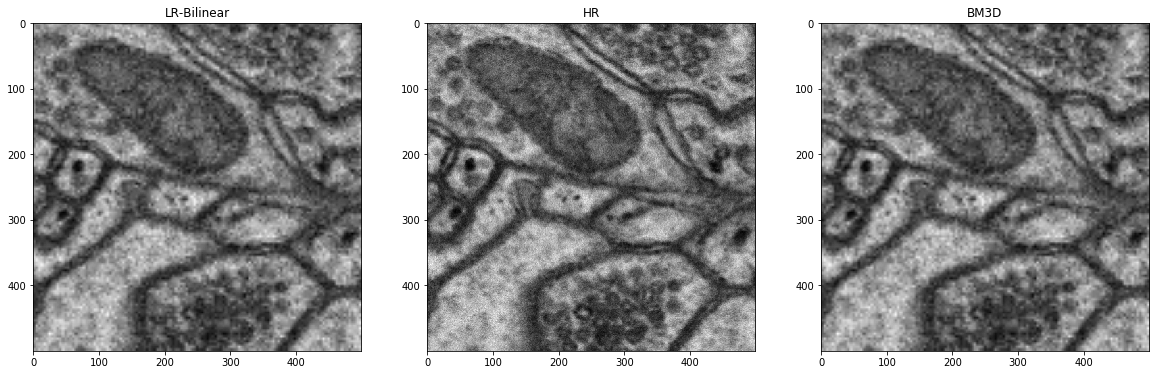

In [51]:
f, axes = plt.subplots(1, 3, figsize=(20,20))
axes[0].imshow(data_arr, cmap=plt.cm.gray)
axes[0].set_title('LR-Bilinear')
axes[1].imshow(target_arr, cmap=plt.cm.gray)
axes[1].set_title('HR')
axes[2].imshow(bm3d_arr, cmap=plt.cm.gray)
axes[2].set_title('BM3D')
plt.show()

In [52]:
bm3d_arr2 = np.asarray(bm3d_arr, np.uint8)
bm3d_arr2.shape

(500, 500)

In [53]:
bm3d_img = Image.fromarray(bm3d_arr2)

In [54]:
bm3d_img.show()

In [55]:
bm3d_img.save(str(output_pth/data_files[sample].name).replace('bilinear', 'bm3d'))

In [19]:
str(output_pth/data_files[sample].name).replace('bilinear', 'bm3d')

'/Users/alaa/data/LR-BM3D/real-world_SEM/realword_SEM_test_bm3d_42.tif'